In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
%run "../../common/file_handler.py"
%run "../../common/matrix.py"
%run "../../common/pca_clu_functions.py"
%run "../../common/statistics.py"

In [ ]:
SCREE_2_XSTART = 1.0
SCREE_2_XSTOP = 2.5
SCREE_2_XSTEP = 0.5
SCREE_3_XSTART = 1.0
SCREE_3_XSTOP = 3.5
SCREE_3_XSTEP = 0.5
SCREE_YSTART = 0.0
SCREE_YSTOP = 1.0
SCREE_YSTEP = 0.05
SCREE_XSIZE = 15
SCREE_YSIZE = 10
HEATMAP_XSIZE = 25
HEATMAP_YSIZE = 30
PCA_XSIZE = 10
PCA_YSIZE = 7
TSNE_XSIZE = 10
TSNE_YSIZE = 7

In [ ]:
SAVE_FIGURE = False

#### Importing matrix and file json

In [50]:
matrix_file = open_file_from_fullpath(ask_file_path(), 'r')
matrix = pd.read_perseus(matrix_file)

In [51]:
json_file = open_file_from_fullpath(ask_file_path(), 'r')

##### Matrix slicing

In [52]:
labels_list = ['QC', 'control', 'onset', 'local', 'post']
qc_matrix = slice_submatrix(matrix, get_value_from_json(json_file, 'QC_slice'))
sample_matrix = slice_submatrix(matrix, get_value_from_json(json_file, 'sample_slice'))
qc_dictionary, qc_matrix = rename_matrixheader_labels( qc_matrix, get_value_from_json(json_file, 'QC_rename'))
sample_dictionary, sample_matrix = rename_matrixheader_labels(sample_matrix, get_value_from_json(json_file, 'sample_rename'))
try:
	ext_matrix = slice_submatrix(matrix, get_value_from_json(json_file, 'EXT_slice'))
	ext_dictionary, ext_matrix = rename_matrixheader_labels(ext_matrix, get_value_from_json(json_file, 'EXT_rename'))
	merged_matrix = pd.concat((qc_matrix, sample_matrix, ext_matrix), axis=1)
	merged_dictionary = qc_dictionary | sample_dictionary | ext_dictionary
	labels_list.append('EXT')
except:
	merged_matrix = pd.concat((qc_matrix, sample_matrix), axis=1)
	merged_dictionary = qc_dictionary | sample_dictionary
merged_matrix = sort_by_injection_order(merged_matrix)
#merged_matrix = multi_to_single_header(merged_matrix, get_value_from_json(json_file, 'header_number'))

## PCA
#### Principal component analysis

#### (n_components = 2)

In [53]:
components_2, variance_2 = do_PCA(merged_matrix, components=2)

#### (n_components = 3)

In [54]:
components_3, variance_3 = do_PCA(merged_matrix, components=3)

### Plot of total variance explained by each individual principal component 

Scree plot of principal components: PCA(n_components = 2)

In [ ]:
plot_explained_variance(components_2, variance_2, get_file_name(matrix_file) + ' - Scree plot of PCA with 2 components', SCREE_2_XSTART, SCREE_2_XSTOP, SCREE_2_XSTEP, SCREE_YSTART, SCREE_YSTOP, SCREE_YSTEP, SCREE_XSIZE, SCREE_YSIZE, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_scree_pca2', '.svg'))

Scree plot: second case PCA(n_components= 3)

In [ ]:
plot_explained_variance(components_3, variance_3, get_file_name(matrix_file) + 'Scree plot of PCA with 3 components', SCREE_3_XSTART, SCREE_3_XSTOP, SCREE_3_XSTEP, SCREE_YSTART, SCREE_YSTOP, SCREE_YSTEP, SCREE_XSIZE, SCREE_YSIZE, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_scree_pca3', '.svg'))

In [55]:
variance_3

array([0.62136737, 0.08923967, 0.03782963])

##### Create dataframe to plot PCA results

In [56]:
df_pca_2 = dataframe_builder(['PC1', 'PC2', 'Labels'], [components_2[0], components_2[1], merged_matrix.columns])
df_pca_3 = dataframe_builder(['PC1', 'PC2', 'PC3', 'Labels'], [components_3[0], components_3[1], components_3[2], merged_matrix.columns])

In [ ]:
save_data(df_pca_2, path=generate_new_file_path(matrix_file, '_dataframe_PCA2components' + ''))
save_data(df_pca_3, path=generate_new_file_path(matrix_file, '_dataframe_PCA3components' + ''))

### PLOTS


In [ ]:
plot_2dimensions(df_pca_2, get_file_name(matrix_file) + ' - PCA 2 components', PCA_XSIZE, PCA_YSIZE, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_pca2', '.svg'))

In [ ]:
plot_3dimensions(df_pca_3, get_file_name(matrix_file) + ' - PCA with 3 components', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_pca3', '.svg'))

#### Computing pairwise distance

In [58]:
all_princ_comp_sort_pca_2, sort_labels_pca_2 = order_labels(df_pca_2)
all_princ_comp_sort_pca_3, sort_labels_pca_3 = order_labels(df_pca_3)

In [59]:
pairwise_distance_pca_2 = pairwise_distances(all_princ_comp_sort_pca_2, n_jobs=-1)
pairwise_distance_pca_3 = pairwise_distances(all_princ_comp_sort_pca_3, n_jobs=-1)

In [60]:
mean_pca2, variance_pca2 = all_intergroup_distances(pairwise_distance_pca_2, sort_labels_pca_2, labels_list)
mean_pca3, variance_pca3 = all_intergroup_distances(pairwise_distance_pca_3, sort_labels_pca_3, labels_list)


Save dataframes pairwise distances

In [ ]:
save_data(pd.DataFrame(pairwise_distance_pca_2), path=generate_new_file_path(matrix_file, '_dataframe_PCA2_pairwise_distance' + ''))
save_data(pd.DataFrame(pairwise_distance_pca_3), path=generate_new_file_path(matrix_file, '_dataframe_PCA3_pairwise_distance' + ''))

In [ ]:
heatmap_plot(pairwise_distance_pca_2, sort_labels_pca_2, sort_labels_pca_2, HEATMAP_XSIZE, HEATMAP_YSIZE, get_file_name(matrix_file) + ' - Pairwise distance of PCA 2 components', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_pca2', '.svg'),vmin =min(pairwise_distance_pca_2.min(), mean_pca2.min()), vmax=max(pairwise_distance_pca_2.max(), mean_pca2.max()))

In [ ]:
heatmap_plot(pairwise_distance_pca_3, sort_labels_pca_3, sort_labels_pca_3, HEATMAP_XSIZE, HEATMAP_YSIZE, get_file_name(matrix_file) +  ' - Pairwise distance PCA 3 components of data normalized by SVR-RBF kernel', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_pca3', '.svg'), vmin=pairwise_distance_pca_3.min(), vmax=pairwise_distance_pca_3.max())

## t-SNE
##### t-distributed stochastic neighbor embedding

In [61]:
tsne_2_components = do_tsne(merged_matrix.T, components=2)

C:\Users\denise\opt\miniconda3\envs\msc\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\denise\opt\miniconda3\envs\msc\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123 samples in 0.000s...
[t-SNE] Computed neighbors for 123 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 123 / 123
[t-SNE] Mean sigma: 59.151072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.307964
[t-SNE] KL divergence after 850 iterations: 0.185143


In [62]:
tsne_3_components = do_tsne(merged_matrix.T, components=3)

C:\Users\denise\opt\miniconda3\envs\msc\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\denise\opt\miniconda3\envs\msc\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123 samples in 0.000s...
[t-SNE] Computed neighbors for 123 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 123 / 123
[t-SNE] Mean sigma: 59.151072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.169312
[t-SNE] KL divergence after 1000 iterations: 1.439454


##### Create dataframes to build plots of t-SNE results

In [63]:
df_tsne_2 = dataframe_builder(['PC1', 'PC2', 'Labels'], [tsne_2_components.T[0], tsne_2_components.T[1], merged_matrix.columns])
df_tsne_3 = dataframe_builder(['PC1', 'PC2', 'PC3' ,'Labels'], [tsne_3_components.T[0], tsne_3_components.T[1], tsne_3_components.T[2], merged_matrix.columns])

In [ ]:
save_data(df_tsne_2, path=generate_new_file_path(matrix_file, '_dataframe_TSNE2components' + ''))
save_data(df_tsne_3, path=generate_new_file_path(matrix_file, '_dataframe_TSNE3components' + ''))

In [ ]:
plot_2dimensions(df_tsne_2, get_file_name(matrix_file) + ' - t-SNE with 2 components', TSNE_XSIZE, TSNE_YSIZE, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_tsne2', '.svg'))

In [ ]:
plot_3dimensions(df_tsne_3, get_file_name(matrix_file) + ' -  t-SNE with 3 components', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_tsne3', '.svg'))

In [64]:
all_princ_comp_sort_tsne_2, sort_labels_tsne_2 = order_labels(df_tsne_2)
all_princ_comp_sort_tsne_3, sort_labels_tsne_3 = order_labels(df_tsne_3)

In [65]:
pairwise_distance_tsne_2 = pairwise_distances(all_princ_comp_sort_tsne_2, n_jobs=-1)
pairwise_distance_tsne_3 = pairwise_distances(all_princ_comp_sort_tsne_3, n_jobs=-1)

In [66]:
mean_tsne2, variance_tsne2 = all_intergroup_distances(pairwise_distance_tsne_2, sort_labels_tsne_2, labels_list)
mean_tsne3, variance_tsne3 = all_intergroup_distances(pairwise_distance_tsne_3, sort_labels_tsne_3, labels_list)


In [ ]:
save_data(pd.DataFrame(pairwise_distance_tsne_2), path=generate_new_file_path(matrix_file, '_dataframe_TSNE2pairwise_distance' + ''))
save_data(pd.DataFrame(pairwise_distance_tsne_3), path=generate_new_file_path(matrix_file, '_dataframe_TSNE3pairwise_distance' + ''))

In [ ]:
heatmap_plot(pairwise_distance_tsne_2, sort_labels_tsne_2, sort_labels_tsne_2, HEATMAP_XSIZE, HEATMAP_YSIZE, get_file_name(matrix_file) + ' - Pairwise distance of t-SNE 2 components', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_tsne2', '.svg'), vmin= min(pairwise_distance_tsne_2.min(), mean_tsne2.min()), vmax=max(pairwise_distance_tsne_2.max(), mean_tsne2.max()))

In [ ]:
heatmap_plot(pairwise_distance_tsne_3, sort_labels_tsne_3, sort_labels_tsne_3, HEATMAP_XSIZE, HEATMAP_YSIZE, get_file_name(matrix_file) + ' - Pairwise distance of t-SNE 3 components', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_tsne3', '.svg'))

Mean and variance inetergroup

In [67]:
formatted_test_pca2 = (np.asarray(["Mean: {0:.5f}\nVariance: {1:.5f}".format(mean, variance) for mean, variance in zip(mean_pca2.flatten(), variance_pca2.flatten())])).reshape(len(labels_list), len(labels_list))
formatted_test_pca3 = (np.asarray(["Mean: {0:.5f}\nVariance: {1:.5f}".format(mean, variance) for mean, variance in zip(mean_pca3.flatten(), variance_pca3.flatten())])).reshape(len(labels_list), len(labels_list))
formatted_test_tsne2 = (np.asarray(["Mean: {0:.5f}\nVariance: {1:.5f}".format(mean, variance) for mean, variance in zip(mean_tsne2.flatten(), variance_tsne2.flatten())])).reshape(len(labels_list), len(labels_list))
formatted_test_tsne3 = (np.asarray(["Mean: {0:.5f}\nVariance: {1:.5f}".format(mean, variance) for mean, variance in zip(mean_tsne3.flatten(), variance_tsne3.flatten())])).reshape(len(labels_list), len(labels_list))

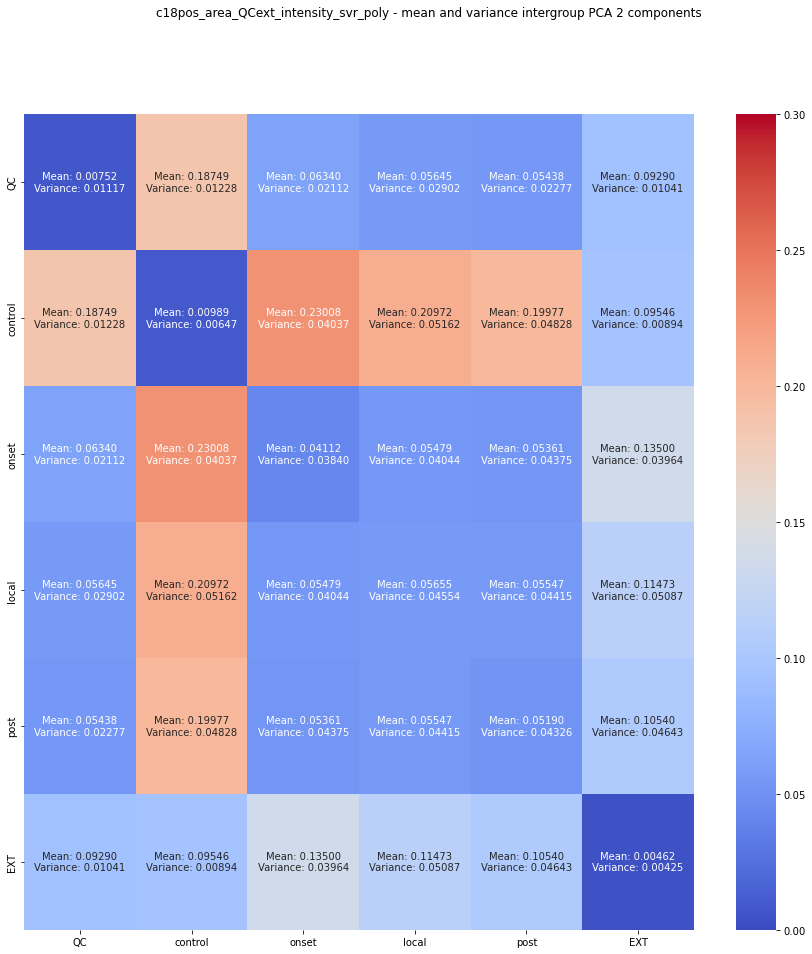

In [68]:
mean_variance_intergroup_PCA2 = plot_intergroup_distance(mean_pca2, formatted_test_pca2, title= get_file_name(matrix_file) + ' - mean and variance intergroup PCA 2 components', xlabel=labels_list, ylabel= labels_list, xsize= 15,ysize= 15, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_mean_integroup_distance_pca2', '.svg' ),vmin=get_value_from_json(json_file, 'intergroup_pca_2_vmin'), vmax=get_value_from_json(json_file, 'intergroup_pca_2_vmax'))

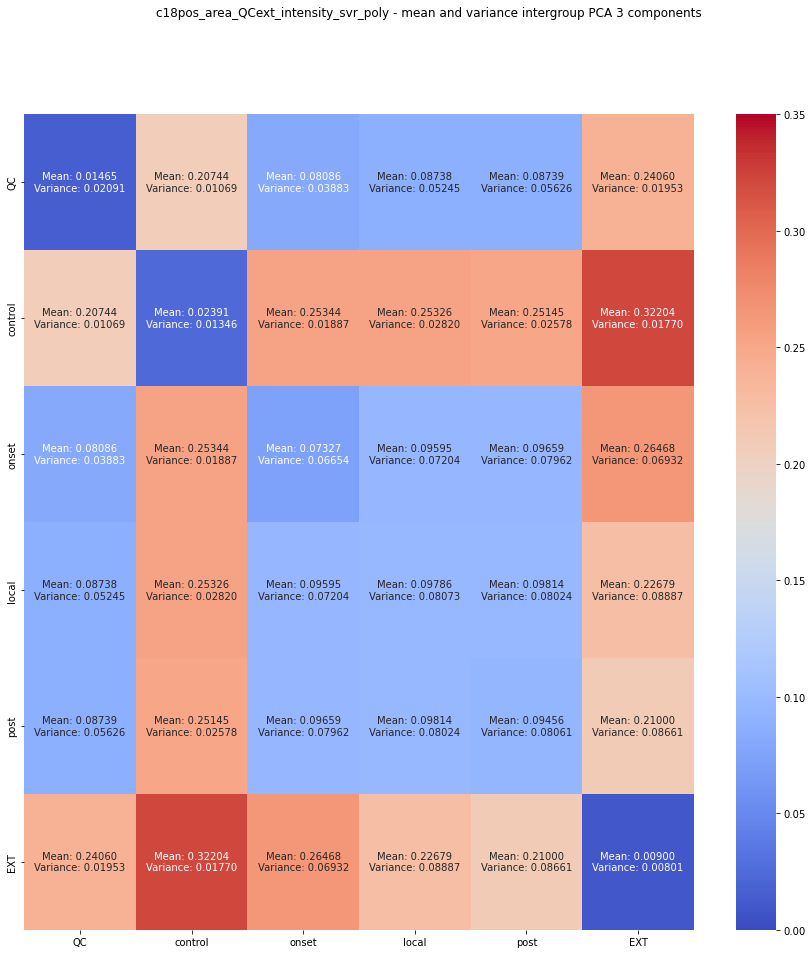

In [69]:
mean_variance_intergroup_PCA3 = plot_intergroup_distance(mean_pca3, formatted_test_pca3, title= get_file_name(matrix_file) + ' - mean and variance intergroup PCA 3 components', xlabel=labels_list, ylabel= labels_list, xsize= 15,ysize= 15, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_mean_integroup_distance_pca3', '.svg' ),vmin=get_value_from_json(json_file, "intergroup_pca_3_vmin"), vmax=get_value_from_json(json_file, "intergroup_pca_3_vmax"))

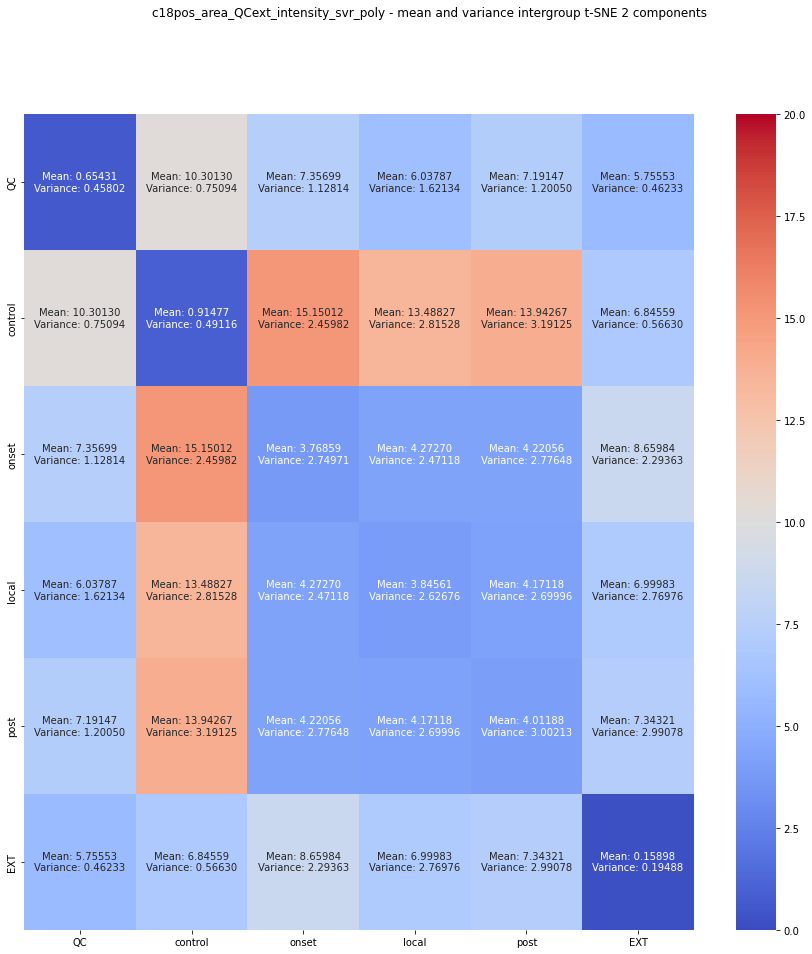

In [70]:
mean_variance_intergroup_TSNE2 = plot_intergroup_distance(mean_tsne2, formatted_test_tsne2, title= get_file_name(matrix_file) + ' - mean and variance intergroup t-SNE 2 components', xlabel=labels_list, ylabel= labels_list, xsize= 15,ysize= 15, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_mean_integroup_distance_tsne2', '.svg' ),vmin=get_value_from_json(json_file, "intergroup_tsne_2_vmin"), vmax=get_value_from_json(json_file, "intergroup_tsne_2_vmax"))

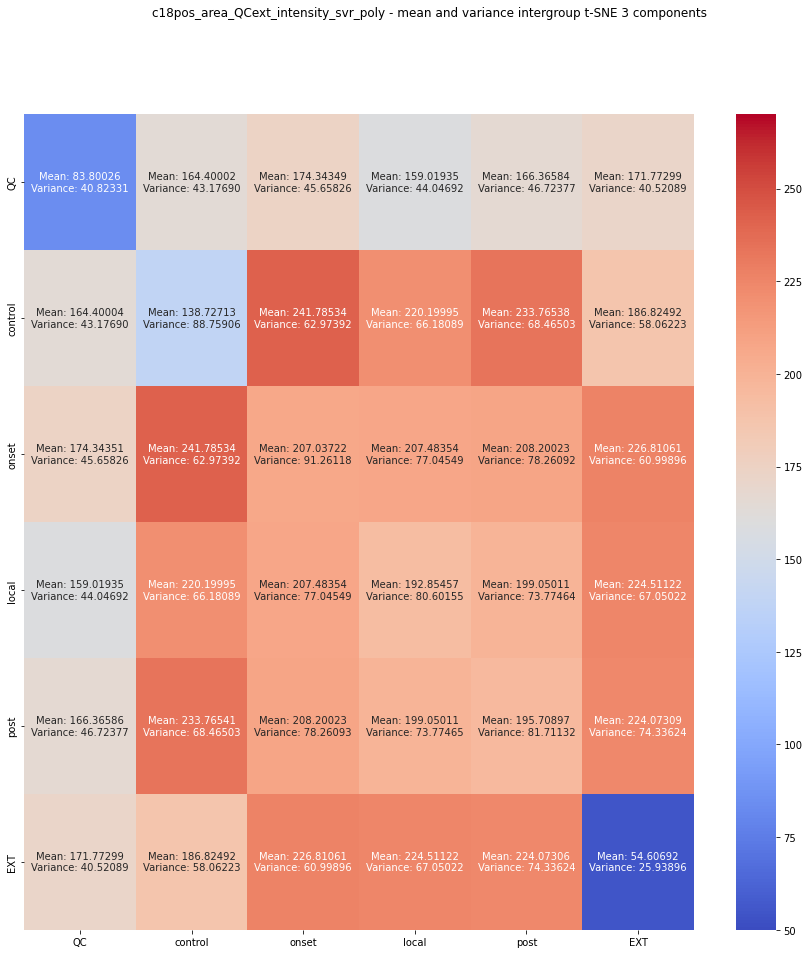

In [71]:
mean_variance_intergroup_TSNE3 = plot_intergroup_distance(mean_tsne3, formatted_test_tsne3, title= get_file_name(matrix_file) + ' - mean and variance intergroup t-SNE 3 components', xlabel=labels_list, ylabel= labels_list, xsize= 15,ysize= 15, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_file), get_file_name(matrix_file), '_heatmap_mean_integroup_distance_tsne3', '.svg' ),vmin=get_value_from_json(json_file, "intergroup_tsne_3_vmin"), vmax=get_value_from_json(json_file, "intergroup_tsne_3_vmax"))

In [48]:
matrix_file.close()


In [49]:
json_file.close()